In [11]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib

import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 72)

In [2]:
from scipy import stats

def read_tejaas(filename):
    rsidlist = list()
    bplist   = list()
    qscales = list()
    pvallist = list()
    qstatlist = list()
    qmeanlist = list()
    qstdlist = list()

    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            bppos = int(linesplit[1])
            pval = float(linesplit[5])
            
            qstat = float(linesplit[2])
            qmean = float(linesplit[3])
            #qstat = qstat #+ np.random.normal(0, 1) * 0.5
            qstd  = float(linesplit[4])
            #qscale = (qstat - qmean) / qstd
            
            rsidlist.append(rsid)
            bplist.append(bppos)
            #pvallist.append(pval)
            #qscales.append(qscale)
            qstatlist.append(qstat)
            qmeanlist.append(qmean)
            qstdlist.append(qstd)
            pvallist.append(pval)

    #pvalarr = 2.0 * (1 - stats.norm.cdf(np.abs(qscales)))
    #pvalarr = 1 - stats.norm.cdf(np.array(qscales))
    #pvallist = [x for x in pvalarr]
    return rsidlist, bplist, pvallist, qstatlist, qmeanlist, qstdlist

In [3]:
resdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized/"
tissue = "esom"

gwrsids = list()
gwpvals = list()
gwnsnps = dict()
gwbppos = dict()
gwqstat = list()
gwqmean = list()
gwqstds = list()
for chrm in range(1, 2):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    rrfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rsids, bplist, pvals, qstats, qmeans, qstds = read_tejaas(rrfile)
    gwrsids += rsids
    gwpvals += pvals
    gwqstat += qstats
    gwqmean += qmeans
    gwqstds += qstds
    gwnsnps[chrm] = len(rsids)
    gwbppos[chrm] = np.array(bplist)

In [4]:
gwpvals = np.array(gwpvals)
pmax  = np.max(gwpvals[np.where(gwpvals > 0)])
nonzero_pvals = gwpvals.copy()
nonzero_pvals[np.where(gwpvals == 0)] = pmax
gwlogpvals = -np.log10(nonzero_pvals)

gwqstat = np.array(gwqstat)
gwqmean = np.array(gwqmean)
gwqstds = np.array(gwqstds)

In [5]:
resdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized_lmcorrected_withage/"
tissue = "as"

gwrsids2 = list()
gwpvals2 = list()
gwnsnps2 = dict()
gwbppos2 = dict()
gwqstat2 = list()
gwqmean2 = list()
gwqstds2 = list()
for chrm in range(1, 2):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    rrfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rsids, bplist, pvals, qstats, qmeans, qstds = read_tejaas(rrfile)
    gwrsids2 += rsids
    gwpvals2 += pvals
    gwqstat2 += qstats
    gwqmean2 += qmeans
    gwqstds2 += qstds
    gwnsnps2[chrm] = len(rsids)
    gwbppos2[chrm] = np.array(bplist)

In [6]:
gwpvals2 = np.array(gwpvals2)
pmax  = np.max(gwpvals2[np.where(gwpvals2 > 0)])
nonzero_pvals = gwpvals2.copy()
nonzero_pvals[np.where(gwpvals2 == 0)] = pmax
gwlogpvals2 = -np.log10(nonzero_pvals)

gwqstat2 = np.array(gwqstat2)
gwqmean2 = np.array(gwqmean2)
gwqstds2 = np.array(gwqstds2)

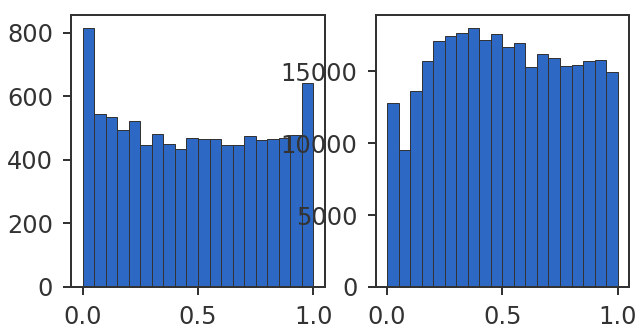

In [7]:
# Check the p-value distribution
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
ax1.hist(gwpvals[nchoose])
ax2.hist(gwpvals2)
plt.show()

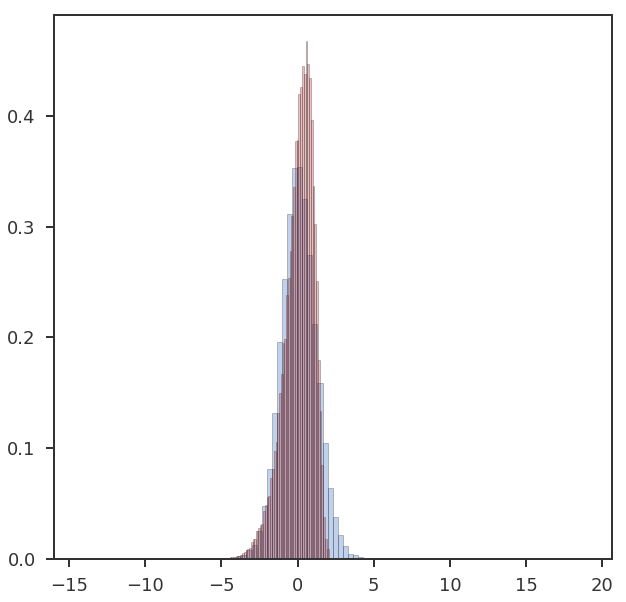

In [20]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)

nchoose = np.where(gwqstds != 0)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
ax1.hist((gwqstat[nchoose] - gwqmean[nchoose]) / gwqstds[nchoose], bins = 100, density = True, alpha = 0.3)
ax1.hist((gwqstat2 - gwqmean2) / gwqstds2, bins = 100, density = True, alpha = 0.3)
#ax1.hist(gwqstds)
#ax2.hist(gwqstds2)
# ax1.set_xlim([-5, 5])
# ax2.set_xlim([-5, 5])
plt.show()

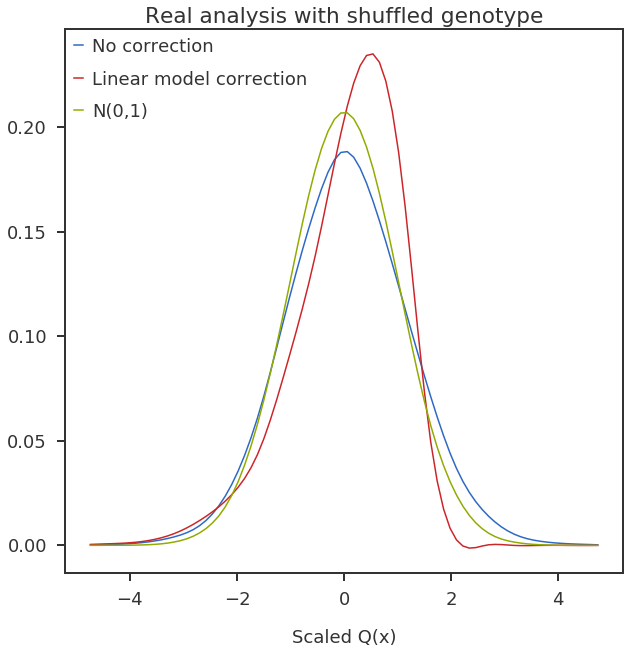

In [24]:
# normdist = np.random.normal(0, 1, size = qscale.shape[0])

# ax1.hist(normdist, bins = 100, alpha = 0.1)
# ax1.hist(qscale, bins = 100, alpha = 0.1)
# ax1.hist(qscale2, bins = 100, alpha = 0.1)
# #ax2.hist(gwqscaled2[nchoose])
# #ax1.set_xlim([-5, 5])
# plt.show()

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)

nchoose = np.where(gwqstds != 0)

qscale = (gwqstat[nchoose] - gwqmean[nchoose]) / gwqstds[nchoose]
qscale2 = (gwqstat2[nchoose] - gwqmean2[nchoose]) / gwqstds2[nchoose]
normdist = np.random.normal(0, 1, size = qscale.shape[0])

# #nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
# ax1.hist((gwqstat[nchoose] - gwqmean[nchoose]) / gwqstds[nchoose], bins = 100, density = True, alpha = 0.3)
# ax1.hist((gwqstat2 - gwqmean2) / gwqstds2, bins = 100, density = True, alpha = 0.3)

from scipy.interpolate import interp1d
bins = np.linspace(-5, 5, 20)
xbin = [(bins[i] + bins[i+1]) / 2 for i in range(bins.shape[0] - 1)] # centers of the bins
x = np.linspace(xbin[0], xbin[-1], 80)

yhist, _ = np.histogram(qscale, bins = bins)
yfreq = yhist / len(qscale)
fy = interp1d(xbin, yfreq, kind = 'cubic')
y = fy(x)
ax1.plot(x, y, alpha = 1, label = 'No correction')

yhist, _ = np.histogram(qscale2, bins = bins)
yfreq = yhist / len(qscale2)
fy = interp1d(xbin, yfreq, kind = 'cubic')
y = fy(x)
ax1.plot(x, y, alpha = 1, label = 'Linear model correction')

yhist, _ = np.histogram(normdist, bins = bins)
yfreq = yhist / len(normdist)
fy = interp1d(xbin, yfreq, kind = 'cubic')
y = fy(x)
ax1.plot(x, y, alpha = 1, label = 'N(0,1)')

ax1.set_xlabel('Scaled Q(x)')
ax1.set_title('Real analysis with shuffled genotype')

ax1.legend()

plt.show()

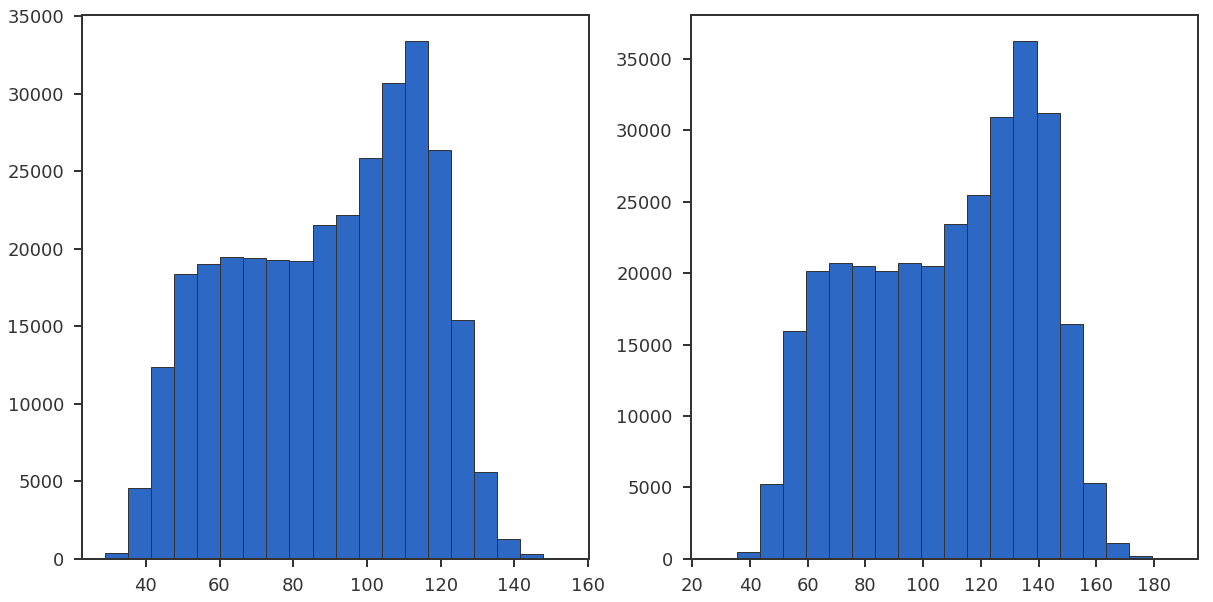

In [25]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
ax1.hist(gwqstat[nchoose])
ax2.hist(gwqstat2[nchoose])
#ax1.scatter(gwqstat[nchoose],  gwqmean[nchoose], s = 1, alpha = 0.9)
#ax2.scatter(gwqstat2[nchoose], gwqmean2[nchoose], s = 1, alpha = 0.9)
#ax1.plot([25, 175], [25, 175], color = 'red')
#ax2.plot([25, 175], [25, 175], color = 'red')
#ax1.set_xlim([100, 110])
#ax1.set_ylim([100, 110])
plt.show()

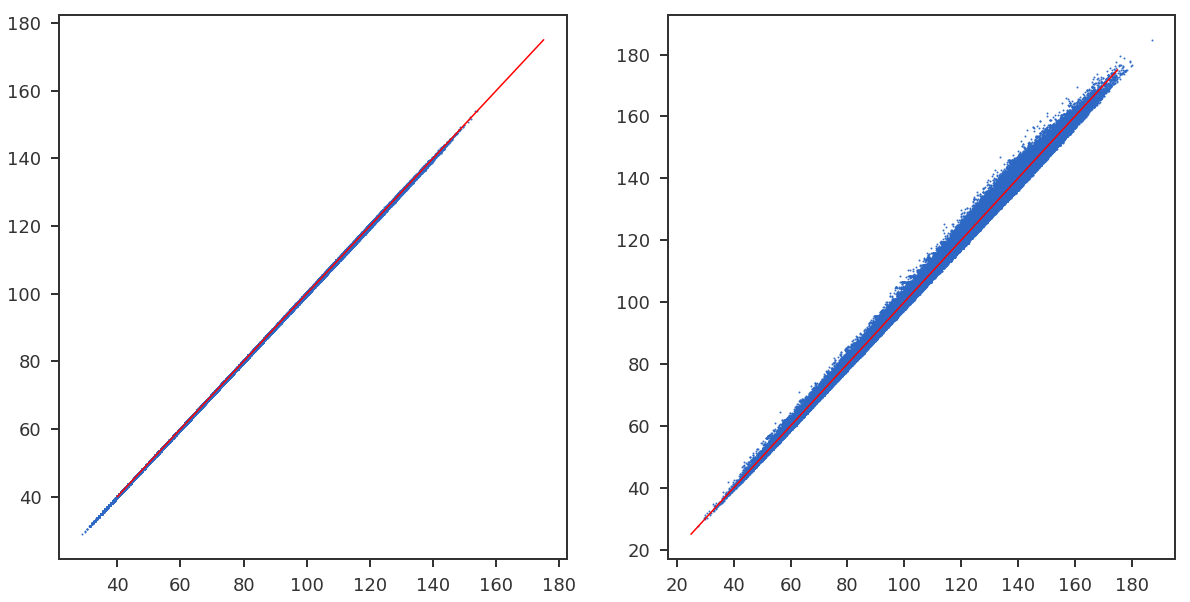

In [27]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
#ax1.hist(gwpvals[nchoose])
#ax2.hist(gwpvals2[nchoose])
ax1.scatter(gwqstat[nchoose],  gwqmean[nchoose], s = 1, alpha = 0.9)
ax2.scatter(gwqstat2[nchoose], gwqmean2[nchoose], s = 1, alpha = 0.9)
ax1.plot([40, 175], [40, 175], color = 'red')
ax2.plot([25, 175], [25, 175], color = 'red')
#ax1.set_xlim([100, 110])
#ax1.set_ylim([100, 110])
plt.show()

In [ ]:
# Manhattan plot

fig = plt.figure(figsize = (25, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

logcutoff = -np.log10(5e-8)

i = 0
start = 0
lastbp = 0
xposlist = list()
chrmnums = np.arange(1,2)
for chrm in chrmnums:
    end = start + gwnsnps[chrm]
    thisbp = gwbppos[chrm]
    xposlist.append(lastbp + int((thisbp[0] + thisbp[-1]) / 2))
    
    ## for tissue 1
    thislogp = gwlogpvals[start:end]
    nchoose = np.where(thislogp >= logcutoff)
    x = lastbp + thisbp[nchoose]
    ax1.scatter(x, thislogp[nchoose], alpha = 0.8, s = 3)
    nchoose = np.where(thislogp < logcutoff)
    nchoose_sparse = np.sort(np.random.choice(nchoose[0], int(nchoose[0].shape[0] / 5), replace=False))
    x = lastbp + thisbp[nchoose_sparse]
    ax1.scatter(x, thislogp[nchoose_sparse], color='gainsboro', s = 3, alpha = 0.1)
    
    ## for tissue 2
    thislogp = gwlogpvals2[start:end]
    nchoose = np.where(thislogp >= logcutoff)
    x = lastbp + thisbp[nchoose]
    ax2.scatter(x, thislogp[nchoose], alpha = 0.8, s = 3)
    nchoose = np.where(thislogp < logcutoff)
    nchoose_sparse = np.sort(np.random.choice(nchoose[0], int(nchoose[0].shape[0] / 5), replace=False))
    x = lastbp + thisbp[nchoose_sparse]
    ax2.scatter(x, thislogp[nchoose_sparse], color='gainsboro', s = 3, alpha = 0.1)

    start = end
    lastbp += thisbp[-1]

for ax in [ax1, ax2]:
    ax.set_xlim(0, lastbp)
    #ax.set_ylim(-1, 20)
    ax.set_xticks(xposlist)
    ax.set_xticklabels(chrmnums)

#outfile = '../plots/manhattan_as_transeqtl_log10pvals_sb0.01_true_vs_random.png'
#plt.savefig(outfile, bbox_inches='tight')

plt.show()